## kNN- Part1

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.shape

(20640, 8)

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
X = df[['AveRooms','HouseAge']]
y = housing.target
X.head()

,AveRooms,HouseAge
0,6.984127,41.0
1,6.238137,21.0
2,8.288136,52.0
3,5.817352,52.0
4,6.281853,52.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02 , random_state = 110)

In [6]:
def euclidean_distance(point1, point2):
    return np.sqrt(sum((point1-point2)**2))
    

In [14]:
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1-point2))
    

In [18]:
def minkowski_distance(point1, point2,p):
    return np.power(sum(np.abs(point1-point2)**p),1/p)
    

In [22]:
def predict_price(X_train,y_train,sample,k=5,p):
    distances = []
    for x in X_train.to_numpy():
        distance = minkowski_distance(sample,x,p)
        distances.append(distance)
    sorted_distances = np.argsort(distances)
    k_nearest_targets = y_train[sorted_distances[:k]]
    predict_price = np.mean(k_nearest_targets)
    return predict_price

In [8]:
sample1 = X_test.iloc[1,:]
k=11
predict_price(X_train,y_train,k,sample1)

1.834818181818182

In [9]:
y_test[1]

1.64

In [20]:
y_preds= []
for x in X_test.to_numpy():
    y_pred = predict_price(X_train,y_train,k,x,3)
    y_preds.append(y_pred)
#y_preds

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse # k=11

1.1126187776035579

In [23]:
def calculate_mse_for_k(X_train,y_train,X_test,y_test,k,p):
    y_preds= []
    for sample in X_test.to_numpy():
        y_pred = predict_price(X_train,y_train,sample,k,p)
        y_preds.append(y_pred)
    mse = mean_squared_error(y_test,y_preds)
    return mse

In [24]:
k_values = range(3,30)

mse_values= []

for k in k_values:
    mse = calculate_mse_for_k(X_train,y_train,X_test,y_test,k,p=3)
    mse_values.append(mse)
mse_values 

[1.3223857911798493,
 1.226145642488786,
 1.1640107197345182,
 1.1731490538884315,
 1.1830984528217916,
 1.1592039591841667,
 1.1495488838645471,
 1.1348525616932275,
 1.1126187776035579,
 1.0922774092274952,
 1.0941643462835966,
 1.0806259815506003,
 1.0796399801020424,
 1.0732458140835397,
 1.067927926828836,
 1.071900315068153,
 1.0576736157723488,
 1.0431306829176856,
 1.032570610018834,
 1.0362290467417274,
 1.0382647157873912,
 1.0359625126632528,
 1.0355690724466262,
 1.0261644329999042,
 1.0221407297741816,
 1.0287051937431684,
 1.029260437342489]

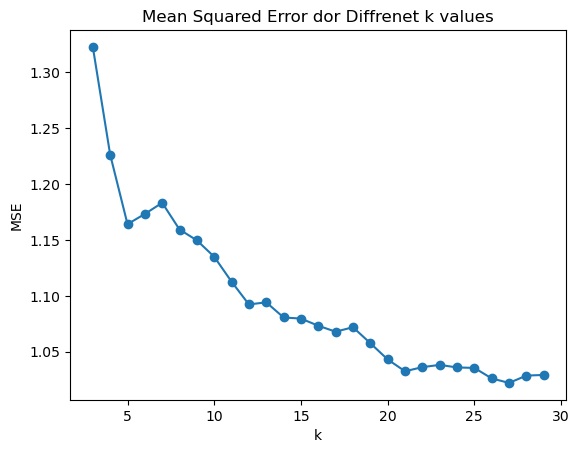

In [27]:
import matplotlib.pyplot as plt

plt. plot(k_values,mse_values, marker = 'o')
plt.title("Mean Squared Error dor Diffrenet k values")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn_regressor = KNeighborsRegressor(n_neighbors=11,p=3)

knn_regressor.fit(X_train,y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

1.1126187776035579